 **Stack Overflow Data - 2017 Survey** 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import ALookAtTheData as t
from IPython import display
%matplotlib inline
"""
Data Understanding

"""
#Reading data from the excel survey result
df = pd.read_csv('survey-results-public.csv') 

#Reading the questions associated with survey result
df2 = pd.read_csv('survey-results-schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,...,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,...,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At least once each week,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all,Several times,Several times,Once or twice,Somewhat agree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",9 to 10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Satisfied,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,I have created a CV or Developer Story on Stac...,8.0,Desktop; iOS browser; iOS app; Android browser...,Several times,Several times,Once or twice,Once or twice,Once or twice,Haven't done at all,Several times,At least once each week,Disagree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,20 or more years,20 or more years,NaN,Other,NaN,NaN,NaN,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Strongly agree,Agree,Somewhat agree,Disagree,Disagree,Agree,...,Very satisfied,A lot of influence,Some influence,Some influence,Some influence,A lot of influence,Some influence,Some i

In [17]:
"""
Cleaning and preparing Data
"""

# Creating a new dataframe by dropping rows which have null 'DeveloperType' entry
new_df=df.dropna(subset=['DeveloperType'],axis=0)

# Creating a new dataframe by taking rows EmploymentStatus as 'Employed full-time'
Employed=new_df[['Respondent','FormalEducation','EmploymentStatus','Salary','JobSatisfaction','CareerSatisfaction']]
Full_time=Employed[Employed['EmploymentStatus']=='Employed full-time']

In [18]:
"""
Modeling Data
"""

def model_data(s):
    """
    This function does calculate the mean value of the attribute given as input.

    Parameters: s(string)- Name of the attribute of which mean will be calculated

    Return: None
    """
    Full_df=Full_time[['Respondent',s,'FormalEducation']]
    Graph=Full_df.groupby('FormalEducation')[s].mean().sort_values()

    result_graph(Graph,s)




In [19]:
"""
Results

"""
def result_graph(Graph,s):
    """
    This function plot the graph of mean value of sttribute given with respect to Formal Education.

    Parameters: Graph(DataFrameGroupBy)- The groupby object after mean value calculation
                s(string)- Name of the attribute of which mean will be calculated
                

    Return: None
    """

    plt.xticks(rotation='vertical')
    plt.barh(Graph.index,Graph.values)
    x="Average "+s
    plt.xlabel(x)
    plt.ylabel('FormalEducation')
    plt.show()

#**Question 1**


*   Do Having higher degree increase chances of having a full time developer job?



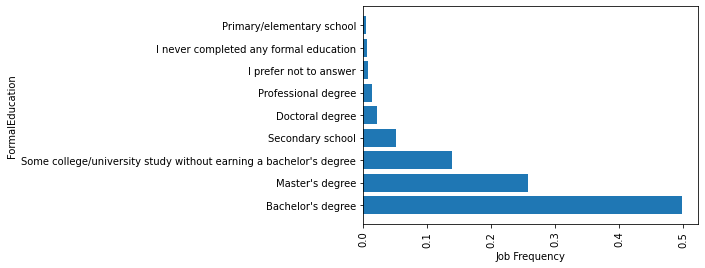

In [20]:
# Preparing Data for Formal Eduactu=ion frequency Calculation 
Full_Education=Full_time[['Respondent','FormalEducation']] 

# Modeling Data to get count of each category of Formal Education
Edu_graph=Full_Education['FormalEducation'].value_counts()/Full_Education.shape[0]

# Plotting the results
plt.xticks(rotation='vertical')
plt.barh(Edu_graph.index,Edu_graph.values)
plt.xlabel('Job Frequency')
plt.ylabel('FormalEducation')
plt.show()

#**Question 2**


*   Do having higher degree increase chances of having a higher salary then normal than others?


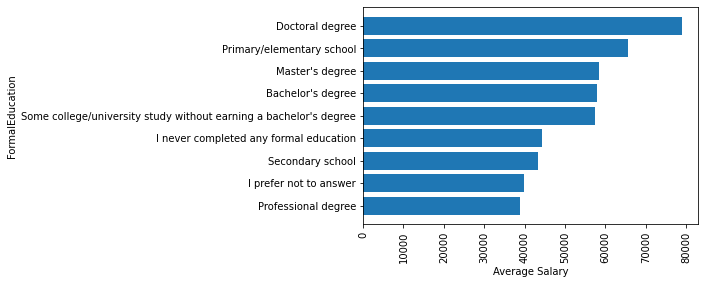

In [21]:
# Calculating average Salary for each group of Formal Education
model_data("Salary")

#**Question 3**


*   Do Having higher degree increase chances of having a high job satisfaction in a full time developer job?


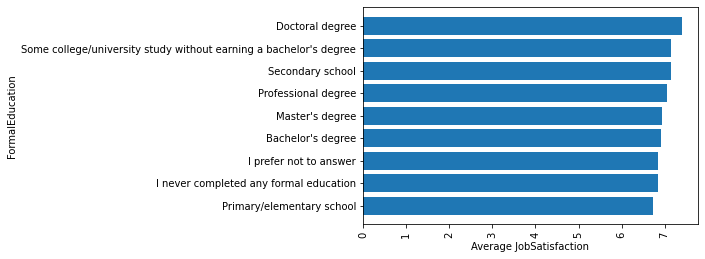

In [22]:
# Calculating average Job Satisfaction for each group of Formal Education
model_data("JobSatisfaction")

#**Question 4**


*   Do Having higher degree increase chances of career satisfaction level?


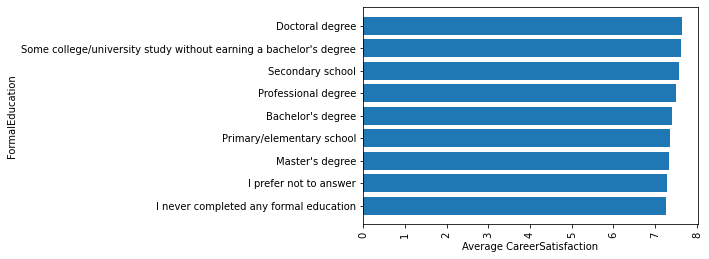

In [23]:
# Calculating average Career Satisfaction for each group of Formal Education
model_data("CareerSatisfaction")